In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random
from itertools import combinations

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


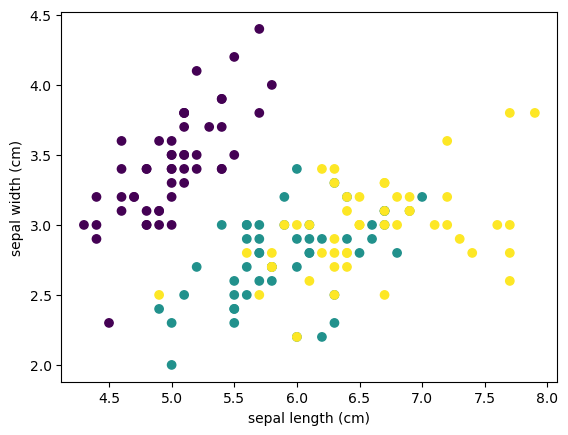

In [3]:
# Импортируем библиотеки
from sklearn import datasets
import matplotlib.pyplot as plt

# Загружаем набор данных
iris_df = datasets.load_iris()

# Методы, доступные для набора данных
print(dir(iris_df))

# Признаки
print(iris_df.feature_names)

# Метки
print(iris_df.target)

# Имена меток
print(iris_df.target_names)

# Разделение набора данных
x_axis = iris_df.data[:, 0]  # Sepal Length
y_axis = iris_df.data[:, 1]  # Sepal Width

# Построение
plt.xlabel(iris_df.feature_names[0])
plt.ylabel(iris_df.feature_names[1])
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

In [4]:
import math


def Distance_ir(a, b, i):
    return math.sqrt((a - iris_df.data[:, 0][i])**2 + (b - iris_df.data[:, 1][i])**2)

In [5]:
iris_df.data[:, 0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [6]:
alpha = -1.5
def Potential_ir(a, b):
    res = 0.
    for i in range(150):
        res += math.exp(alpha * Distance_ir(a, b, i))
    return res

def Potential_arr_ir(a, b):
    res = np.array([])
    for i in range(150):
        res = np.append(res, np.array([Potential_ir(a[i], b[i])]))
    return res

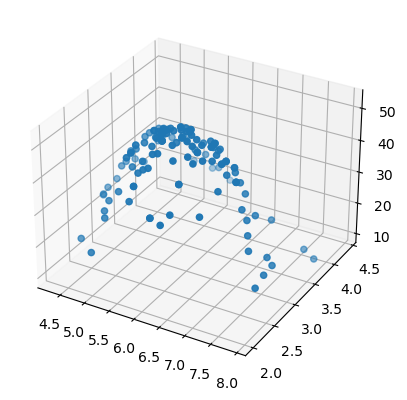

In [7]:
x = iris_df.data[:, 0]
y = iris_df.data[:, 1]
z = Potential_arr_ir(x, y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z)

plt.show()

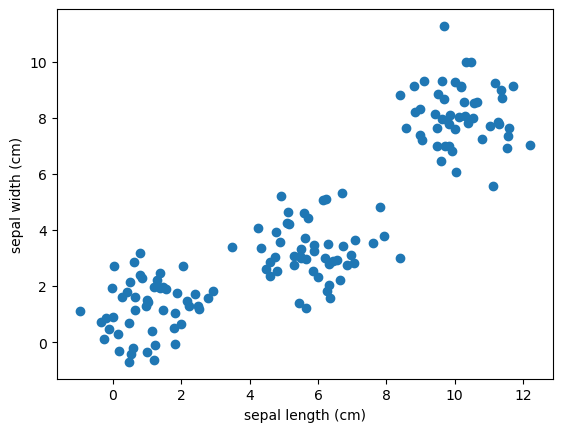

In [15]:
x = np.append(np.append(np.random.normal(loc=1, scale=1, size=50), np.random.normal(loc=6, scale=1, size=50)), np.random.normal(loc=10, scale=1, size=50))
y = np.append(np.append(np.random.normal(loc=1, scale=1, size=50), np.random.normal(loc=3, scale=1, size=50)), np.random.normal(loc=8, scale=1, size=50))

def Distance(a, b, i):
    return math.sqrt((a - x[i])**2 + (b - y[i])**2)
def dist(p1, p2):
    (x1, y1), (x2, y2) = p1, p2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
points = list(zip(x,y))
distances = [dist(p1, p2) for p1, p2 in combinations(points, 2)]
avlpha = -1 / (sum(distances) / len(distances))
def Potential(a, b):
    res = 0.
    for i in range(150):
        res += math.exp(alpha * Distance(a, b, i))
    return res

def Potential_arr(a, b):
    res = np.array([])
    for i in range(150):
        res = np.append(res, np.array([Potential(a[i], b[i])]))
    return res

# Построение
plt.xlabel(iris_df.feature_names[0])
plt.ylabel(iris_df.feature_names[1])
plt.scatter(x, y)
plt.show()

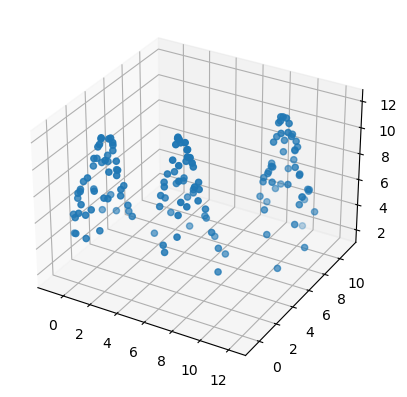

In [16]:
z = Potential_arr(x, y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z)

plt.show()

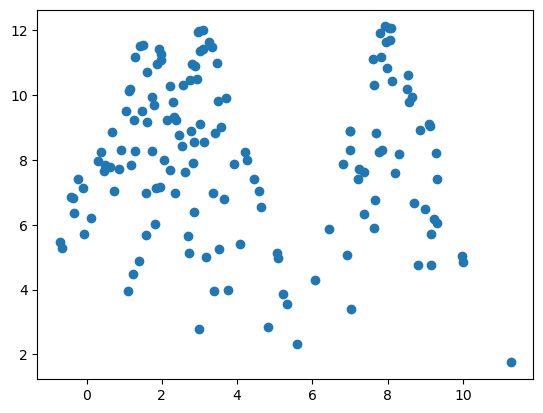

In [17]:
plt.scatter(y, z)
plt.show()

12.114875531898567 9.778300931781937 7.937231405436198


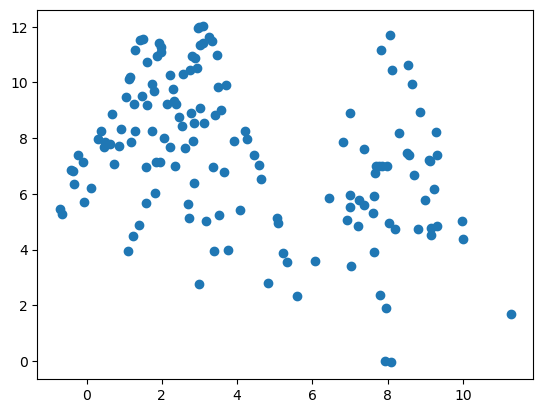

In [18]:
beta = alpha
max1 = np.max(z)
print(max1, x[z.argmax()], y[z.argmax()])
for i in range(150):
    z[i] = z[i] - max1 * math.exp(beta * Distance(x[z.argmax()], y[z.argmax()], i))
plt.scatter(y, z)
plt.show()

12.009274335531302 5.470980268219146 3.0825692312854387


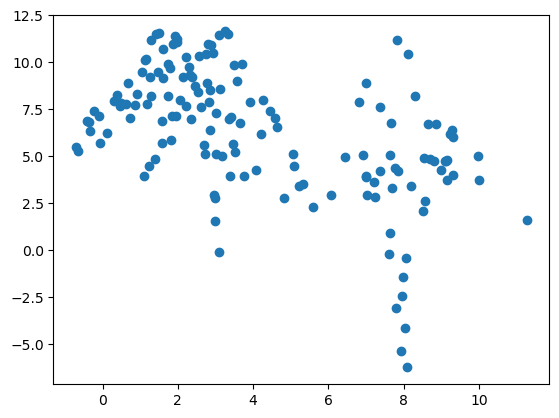

In [19]:
max2 = np.max(z)
print(max2, x[z.argmax()], y[z.argmax()])
for i in range(150):
    z[i] = z[i] - max1 * math.exp(beta * Distance(x[z.argmax()], y[z.argmax()], i))
plt.scatter(y, z)
plt.show()

11.629845530635112 5.87158892757737 3.2539335678690526


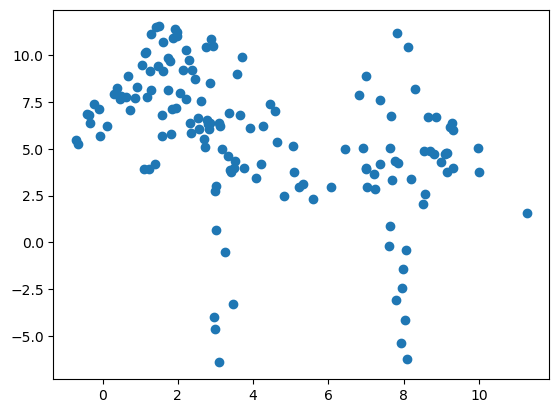

In [20]:
max3 = np.max(z)
print(max3, x[z.argmax()], y[z.argmax()])
for i in range(150):
    z[i] = z[i] - max1 * math.exp(beta * Distance(x[z.argmax()], y[z.argmax()], i))
plt.scatter(y, z)
plt.show()

11.534479133740756 0.9818469665556098 1.4968512014860285


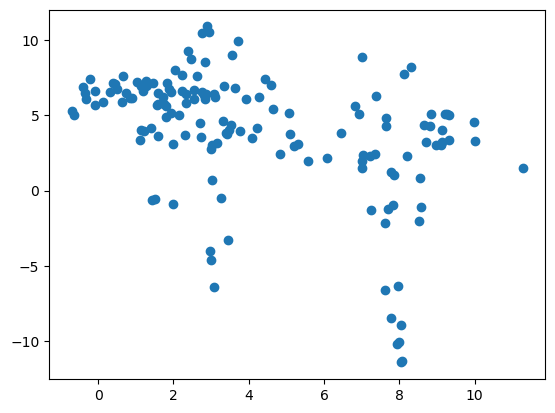

In [21]:
max4 = np.max(z)
print(max4, x[z.argmax()], y[z.argmax()])
for i in range(150):
    z[i] = z[i] - max1 * math.exp(beta * Distance(x[z.argmax()], y[z.argmax()], i))
plt.scatter(y, z)
plt.show()